### Customer Segmentation

### Prep

In [1]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt

Import dataset

In [2]:
df = pd.read_parquet('df.parquet')

In [3]:
df.dtypes
df = df.convert_dtypes('convert_integer=age')

In [4]:
df.fillna(value='None', inplace=True)

### EDA

In [5]:
df.head()

,orderID,orderDate,clienteID,CEP,estado,bairro,cidade,rua,numero,endereco,gender,age,plataform,total,cupon
0,1,24/11/2022 19:03,b23d4264-b084-4b5f-b341-fb1775b0a2f9,81650130,PR,Boqueirão,Curitiba,Rua São Pedro,821,"Rua São Pedro, 821 - Boqueirão, Curitiba - PR,...",Female,23,app,134.56,None
1,2,26/02/2022 11:57,eec8a486-7373-4d7d-a859-750455fd190c,80240150,PR,Água Verde,Curitiba,Travessa Lange,211,"Travessa Lange, 211 - Água Verde, Curitiba - P...",Female,35,android,1242.82,VERAOOFF15
2,3,13/05/2022 10:40,33bde395-65fa-43aa-bb9b-90b8e9e4bbba,82220416,PR,Cachoeira,Curitiba,Rua Rolando Salin Zappa Mansur,549,"Rua Rolando Salin Zappa Mansur, 549 - Cachoeir...",Female,29,android,1118.59,FOX5POR3
3,4,16/08/2022 12:17,9f95c07d-d9e3-45d4-835e-a0dbc87d22ac,82220360,PR,Cachoeira,Curitiba,Rua Maria Lenk,546,"Rua Maria Lenk, 546 - Cachoeira, Curitiba - PR...",Male,21,ios,1384.44,None
4,5,07/10/2022 09:52,6095ef93-3172-4a95-838e-5fa7f2ddb108,80230972,PR,Rebouças,Curitiba,Rua João Negrão,353,"Rua João Negrão, 353 - Rebouças, Curitiba - PR...",Female,30,safari,357.6,None


In [6]:
# Check to see descriptive statistics
df.describe()

,orderID,CEP,numero,age,total
count,5000.0,5000.0,5000.0,5000.0,5000.0
mean,2500.5,80799363.3262,559.264,29.8972,1055.309534
std,1443.520003,878357.46385,262.204273,6.020455,549.479098
min,1.0,80001970.0,100.0,20.0,100.85
25%,1250.75,80050260.0,329.0,25.0,578.8
50%,2500.5,80250903.0,567.0,30.0,1063.45
75%,3750.25,81650020.0,791.0,35.0,1526.195
max,5000.0,82560971.0,1000.0,40.0,1999.81


Text(0.5, 1.0, 'Distribution of Gender')

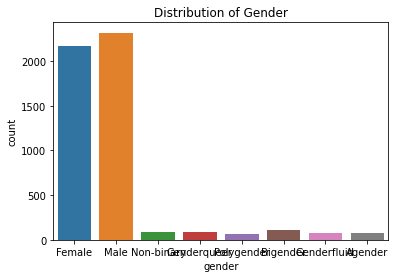

In [7]:
# See the distribution of gender to recognize different distributions
sns.countplot(data=df, x='gender')
plt.title('Distribution of Gender')

Text(0.5, 0, 'Age')

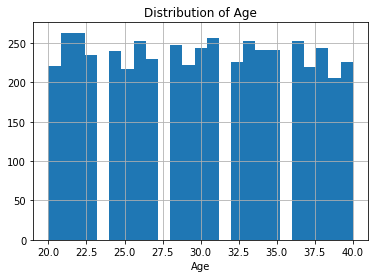

In [8]:
# Histogram of ages
df.hist('age', bins=25);
plt.title('Distribution of Age');
plt.xlabel('Age')

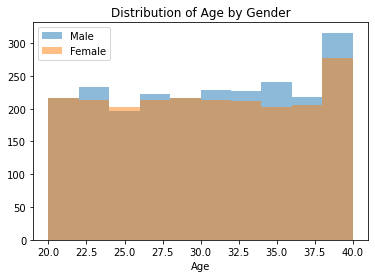

In [13]:
# Histogram of ages by gender
plt.hist('age', data=df[df['gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('age', data=df[df['gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.legend()

Text(0.5, 0, 'Total Spend by Transaction')

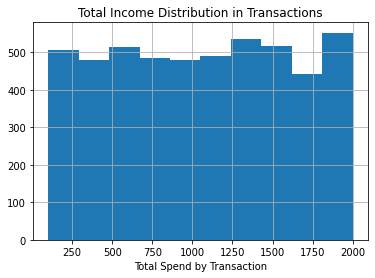

In [16]:
# Histogram of income
df.hist('total')
plt.title('Total Income Distribution in Transactions')
plt.xlabel('Total Spend by Transaction')

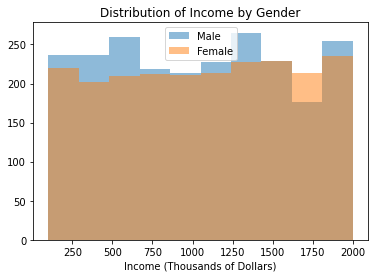

In [15]:
# Histogram of income by gender
plt.hist('total', data=df[df['gender'] == 'Male'], alpha=0.5, label='Male')
plt.hist('total', data=df[df['gender'] == 'Female'], alpha=0.5, label='Female')
plt.title('Distribution of Income by Gender')
plt.xlabel('Income (Thousands of Dollars)')
plt.legend()

In [ ]:
# Create data sets by gender
male_customers = df[df['gender'] == 'Male']
female_customers = df[df['gender'] == 'Female']